In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Uniformity

In [2]:
temperatures = {"date": ["03.03.19","04.03.19","05.03.19","06.03.19","07.03.19","08.03.19"], 
                "temperature" : [14.0, 15.6, 73.6,18.5,66.4, 33.5]
               }
temperatures = pd.DataFrame(temperatures)
temperatures

,date,temperature
0,03.03.19,14.0
1,04.03.19,15.6
2,05.03.19,73.6
3,06.03.19,18.5
4,07.03.19,66.4
5,08.03.19,33.5


In [3]:
# Convert the dates to datetime object

temperatures["date"] = pd.to_datetime(temperatures["date"])

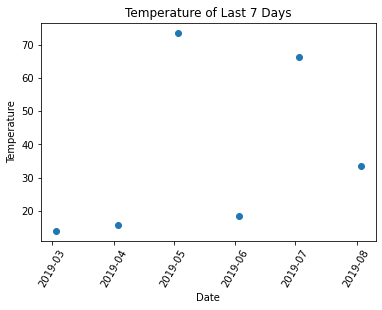

In [4]:
# We can see that some of the teperatures are not usual
# We can see them in scatterplot

plt.scatter(x = "date", y = "temperature", data = temperatures)
plt.xlabel("Date")
plt.ylabel("Temperature")
plt.title("Temperature of Last 7 Days")
plt.xticks(rotation=60);

In [63]:
## We can see that the outlier temp are taken in farenheit

temp_fah = temperatures.loc[temperatures['temperature'] > 40, 'temperature']
temp_fah

2    73.6
4    66.4
Name: temperature, dtype: float64

In [64]:
# Now we can convert them into celcius 

temp_cels = (temp_fah - 32) * (5/9)
temp_cels

2    23.111111
4    19.111111
Name: temperature, dtype: float64

In [65]:
# Now again we can store them into the temperature column after converting them

temperatures.loc[temperatures['temperature'] > 40, 'temperature'] = temp_cels 

In [66]:
temperatures["temperature"]

0    14.000000
1    15.600000
2    23.111111
3    18.500000
4    19.111111
5    33.500000
Name: temperature, dtype: float64

In [67]:
# Assert conversion is correct
assert temperatures['temperature'].max() < 40

### Ex 1: Uniformity in Dates



In [81]:
birthdays = {"Birthday" : ["27/27/19", "03-29-19", "March 3rd, 2019","24-03-19","06-03-19"],
    
            "First name" :  ["Rowan", "Brynn","Sophia","Deacon","Griffith"], 
             
            "Last name" : ["Nunez", "Yang", "Reilly","Prince","Neal"],
            }

birthdays = pd.DataFrame(birthdays)
birthdays

,Birthday,First name,Last name
0,27/27/19,Rowan,Nunez
1,03-29-19,Brynn,Yang
2,"March 3rd, 2019",Sophia,Reilly
3,24-03-19,Deacon,Prince
4,06-03-19,Griffith,Neal


In [82]:
# Convert the dates to datetime object

birthdays["Birthday"] = pd.to_datetime(birthdays["Birthday"])

ParserError: month must be in 1..12: 27/27/19

In [83]:
## When we try to convert these dates to pandas datetime object it shows us error
## What we can do is--
## Use the infer_datetime_format and errors parameter

birthdays['Birthday'] = pd.to_datetime(birthdays['Birthday'],
                                        
                                       # Attempt to infer format of each date
                                        infer_datetime_format=True,
                                        
                                       # Return NA for rows where conversion failed
                                        errors = 'coerce'
                                      )

In [84]:
birthdays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Birthday    4 non-null      datetime64[ns]
 1   First name  5 non-null      object        
 2   Last name   5 non-null      object        
dtypes: datetime64[ns](1), object(2)
memory usage: 248.0+ bytes


In [85]:
birthdays

,Birthday,First name,Last name
0,NaT,Rowan,Nunez
1,2019-03-29,Brynn,Yang
2,2019-03-03,Sophia,Reilly
3,2019-03-24,Deacon,Prince
4,2019-06-03,Griffith,Neal


In [86]:
## We can change the format of our datetime object

birthdays['Birthday'] = birthdays['Birthday'].dt.strftime("%d-%m-%Y")
birthdays

,Birthday,First name,Last name
0,NaN,Rowan,Nunez
1,29-03-2019,Brynn,Yang
2,03-03-2019,Sophia,Reilly
3,24-03-2019,Deacon,Prince
4,03-06-2019,Griffith,Neal


### Cross field validation

The use of multiple fields in a dataset to sanity check data integrity

In [4]:
flights = {"flight_number": ["DL140","BA248","MEA124","AFR939","TKA101", "RS101"], 'economy_class':[100,130,100,140,130,100],
            
           'business_class':[60,100,50,70,100,70], 'first_class':[40,70,50,90,20,60],
           'total_passengers':[200,300,200,300,250,200]
            
          }
flights = pd.DataFrame(flights)
flights

,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250
5,RS101,100,70,60,200


In [5]:
## We'll check if the total passanger col has all the value correct or not

sum_of_class = flights[["economy_class", "business_class", "first_class"]].sum(axis = 1)
sum_of_class

0    200
1    300
2    200
3    300
4    250
5    230
dtype: int64

In [10]:
## Sanity check

passenger_equ = sum_of_class == flights["total_passengers"]
passenger_equ

0     True
1     True
2     True
3     True
4     True
5    False
dtype: bool

In [11]:
# Find the rows with inconsistent passenger totals
inconsistent_pass = flights[~passenger_equ]
inconsistent_pass

,flight_number,economy_class,business_class,first_class,total_passengers
5,RS101,100,70,60,200


In [12]:
# filter out rows with inconsistent passenger totals
consistent_pass = flights[passenger_equ]
consistent_pass

,flight_number,economy_class,business_class,first_class,total_passengers
0,DL140,100,60,40,200
1,BA248,130,100,70,300
2,MEA124,100,50,50,200
3,AFR939,140,70,90,300
4,TKA101,130,100,20,250


### Cross field validation for datetime

In [24]:
users = {"user_id" : [12,14,24,15,45], "Age" : [23,28,42,30,19],
         
    "Birthday" : ["1998-03-02", "1993-12-04","1978-11-24","1989-01-03","2002-07-02"]
}

users = pd.DataFrame(users)
users

,user_id,Age,Birthday
0,12,23,1998-03-02
1,14,28,1993-12-04
2,24,42,1978-11-24
3,15,30,1989-01-03
4,45,19,2002-07-02


In [25]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   user_id   5 non-null      int64 
 1   Age       5 non-null      int64 
 2   Birthday  5 non-null      object
dtypes: int64(2), object(1)
memory usage: 248.0+ bytes


In [26]:
# Convert the Birthday column from object to datetime
users['Birthday'] = pd.to_datetime(users['Birthday'])

In [27]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   5 non-null      int64         
 1   Age       5 non-null      int64         
 2   Birthday  5 non-null      datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 248.0 bytes


In [28]:
import datetime as dt

# get today's date
today = dt.date.today()
today

datetime.date(2021, 10, 28)

In [32]:
# For each row in the Birthday column, calculate year difference
age_manual = today.year - users['Birthday'].dt.year
age_manual

0    23
1    28
2    43
3    32
4    19
Name: Birthday, dtype: int64

In [33]:
users.head()

,user_id,Age,Birthday
0,12,23,1998-03-02
1,14,28,1993-12-04
2,24,42,1978-11-24
3,15,30,1989-01-03
4,45,19,2002-07-02


In [35]:
# Find instances where ages match
age_equ = age_manual == users["Age"]
age_equ

0     True
1     True
2    False
3    False
4     True
dtype: bool

In [38]:
age_inconsistent = users[~age_equ]
age_inconsistent

,user_id,Age,Birthday
2,24,42,1978-11-24
3,15,30,1989-01-03


In [37]:
age_consistent = users[age_equ]
age_consistent

,user_id,Age,Birthday
0,12,23,1998-03-02
1,14,28,1993-12-04
4,45,19,2002-07-02
